In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools

In [ ]:
data = pd.read_csv('/content/creditcard.csv.crdownload')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.shape

(11665, 31)

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,...,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000
mean,7701.086069,-0.219601,0.274988,0.897990,0.281016,-0.078995,0.140055,-0.111620,-0.051877,0.893589,...,-0.061180,-0.155205,-0.034310,0.017421,0.101538,0.070630,0.007481,0.000804,62.795132,0.004201
std,5964.969525,1.561122,1.305785,1.272504,1.467970,1.184333,1.305472,1.129256,1.236992,1.182130,...,0.902556,0.624275,0.508488,0.592137,0.429725,0.560307,0.406841,0.262342,179.816783,0.064681
min,0.000000,-27.670569,-34.607649,-21.405836,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.555808,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2463.000000,-0.987193,-0.257287,0.416175,-0.615559,-0.680719,-0.622413,-0.583742,-0.186419,0.181510,...,-0.268948,-0.545531,-0.172765,-0.332771,-0.146729,-0.346888,-0.080638,-0.015513,5.000000,0.000000
50%,6308.000000,-0.347783,0.262619,0.950034,0.215393,-0.179654,-0.147786,-0.088491,0.011665,0.880826,...,-0.130094,-0.129191,-0.044523,0.073145,0.139638,0.009023,-0.003818,0.015397,15.950000,0.000000
75%,11898.000000,1.159319,0.888750,1.616224,1.153380,0.348187,0.508886,0.439387,0.267067,1.570361,...,0.023295,0.235448,0.076761,0.402522,0.374859,0.417677,0.108443,0.073961,50.000000,0.000000
max,19915.000000,1.960497,9.067613,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.599543,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11665 entries, 0 to 11664
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11665 non-null  int64  
 1   V1      11665 non-null  float64
 2   V2      11665 non-null  float64
 3   V3      11665 non-null  float64
 4   V4      11665 non-null  float64
 5   V5      11665 non-null  float64
 6   V6      11665 non-null  float64
 7   V7      11665 non-null  float64
 8   V8      11665 non-null  float64
 9   V9      11665 non-null  float64
 10  V10     11665 non-null  float64
 11  V11     11665 non-null  float64
 12  V12     11664 non-null  float64
 13  V13     11664 non-null  float64
 14  V14     11664 non-null  float64
 15  V15     11664 non-null  float64
 16  V16     11664 non-null  float64
 17  V17     11664 non-null  float64
 18  V18     11664 non-null  float64
 19  V19     11664 non-null  float64
 20  V20     11664 non-null  float64
 21  V21     11664 non-null  float64
 22

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
data['Amount'].describe()

count    11664.000000
mean        62.795132
std        179.816783
min          0.000000
25%          5.000000
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

In [ ]:
non_fraud = len(data[data['Class'] == 0])
fraud = len(data[data['Class'] == 1])
fraud_percentage = round(fraud/(fraud+non_fraud)*100,2)
print(non_fraud)
print(fraud)
print(fraud_percentage)


11615
49
0.42


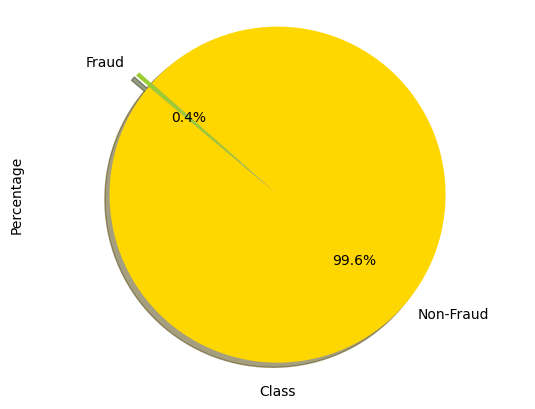

In [ ]:
import matplotlib.pyplot as plt
labels = ['Non-Fraud', 'Fraud']
sizes = [non_fraud, fraud]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.axis('equal')
plt.show()

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data["NormalizedAmount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))
data.drop(["Amount"], inplace= True, axis= 1)
y = data["Class"]
x = data.drop(["Class"], axis= 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.3, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8165, 30)
(3500, 30)
(8165,)
(3500,)


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train_imputed, y_train_imputed)
pred_rf = classifier.predict(x_test_imputed)
print(pred_rf)
random_forest_score = classifier.score(x_test_imputed, y_test_imputed)
print(random_forest_score)

[0. 0. 0. ... 0. 0. 0.]
0.9997142857142857


### **Decision Tree**

In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with a strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to x_train and transform x_test
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)


In [ ]:
import numpy as np

# Convert y_train Series to a NumPy array and reshape it
y_train_array = np.array(y_train).reshape(-1, 1)

# Fit the imputer to y_train and transform y_test
y_train_imputed = imputer.fit_transform(y_train_array).ravel()
y_test_imputed = imputer.transform(np.array(y_test).reshape(-1, 1)).ravel()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_imputed, y_train_imputed)
pred_dt = classifier.predict(x_test_imputed)
print(pred_dt)
decision_tree_score = classifier.score(x_test_imputed, y_test_imputed)
print(decision_tree_score)

[0. 0. 0. ... 0. 0. 0.]
0.9968571428571429
